<a href="https://colab.research.google.com/github/Rajibsigdel12345/DevnagariScriptRecognition/blob/main/DevnagariScriptRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajibsigdel","key":"8c6dca64297ea579666439ed35f6e441"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d rishianand/devanagari-character-set
! mkdir train
! unzip devanagari-character-set.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/Images/Images/digit_7/56662.png  
  inflating: train/Images/Images/digit_7/56663.png  
  inflating: train/Images/Images/digit_7/56664.png  
  inflating: train/Images/Images/digit_7/56665.png  
  inflating: train/Images/Images/digit_7/56666.png  
  inflating: train/Images/Images/digit_7/56667.png  
  inflating: train/Images/Images/digit_7/56668.png  
  inflating: train/Images/Images/digit_7/56669.png  
  inflating: train/Images/Images/digit_7/56670.png  
  inflating: train/Images/Images/digit_7/56671.png  
  inflating: train/Images/Images/digit_7/56672.png  
  inflating: train/Images/Images/digit_7/56673.png  
  inflating: train/Images/Images/digit_7/56674.png  
  inflating: train/Images/Images/digit_7/56675.png  
  inflating: train/Images/Images/digit_7/56676.png  
  inflating: train/Images/Images/digit_7/56677.png  
  inflating: train/Images/Images/digit_7/56678.png  
  inflating: train/Images/Images/digit_7/56679.p

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [4]:
df = pd.read_csv('/content/train/data.csv')
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
a = np.array(df.iloc[5000].tolist()[0:-1]).reshape(32,-1)

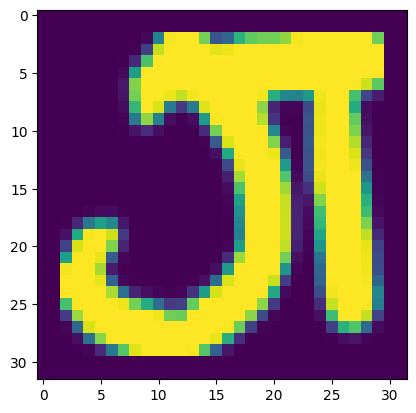

In [6]:
plt.imshow(a)

In [7]:
batch_size = 32
img_height = 32
img_width = 32
data_dir = '/content/train/Images/Images'
kernel_size = (3,3)
pool_size = (2,2)
epochs = 500

In [49]:
def preprocess_train_image(image,label=None):
  # Apply your preprocessing function here
  # For example, you could normalize the pixel values
  image = tf.image.per_image_standardization(image)
  if label:
    label = tf.one_hot(label,46)
    return image,label
  return image

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed  = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 92000 files belonging to 46 classes.
Using 73600 files for training.
Found 92000 files belonging to 46 classes.
Using 18400 files for validation.


In [10]:
train_ds = train_ds.map(preprocess_train_image)
val_ds = val_ds.map(preprocess_train_image)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)


In [11]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 46), dtype=tf.float32, name=None))>

In [12]:
import tensorflow.keras.layers as tfl
import cv2

In [13]:

input = tfl.Input(shape = (img_height,img_width,3))
x = tfl.Conv2D(8,kernel_size = kernel_size, padding = 'same', strides = (1,1))(input)
x = tfl.ReLU()(x)
x = tfl.MaxPooling2D(pool_size = pool_size, padding = 'same')(x)
x = tfl.Conv2D(16, kernel_size = kernel_size , padding = 'same', strides = (2,2))(x)
x = tfl.ReLU()(x)
x = tfl.MaxPooling2D(pool_size = pool_size, padding = 'same', strides = (1,1))(x)
x = tfl.Conv2D(32, kernel_size = kernel_size , padding = 'valid', strides = (2,2))(x)
x = tfl.ReLU()(x)
x = tfl.Flatten()(x)
x = tfl.Dense(400, activation= 'relu')(x)
x = tfl.Dropout(0.2)(x)
output = tfl.Dense(46,activation = 'softmax')(x)
model = tf.keras.Model(inputs = input , outputs = output)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          1168      
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [15]:
loss = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = loss, metrics = ['accuracy'])

In [16]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.EarlyStopping(),tf.keras.callbacks.ModelCheckpoint(filepath ='/content/train/checkpoint' ,save_best_only = True, save_weights = True)],
    shuffle = True,
    )

Epoch 1/500
2300/2300 [==============================] - 67s 28ms/step - loss: 0.5839 - accuracy: 0.8294 - val_loss: 0.2013 - val_accuracy: 0.9383
Epoch 2/500
2300/2300 [==============================] - 64s 28ms/step - loss: 0.1908 - accuracy: 0.9391 - val_loss: 0.1363 - val_accuracy: 0.9565
Epoch 3/500
2300/2300 [==============================] - 62s 27ms/step - loss: 0.1340 - accuracy: 0.9574 - val_loss: 0.1236 - val_accuracy: 0.9608
Epoch 4/500
2300/2300 [==============================] - 66s 29ms/step - loss: 0.1076 - accuracy: 0.9650 - val_loss: 0.1359 - val_accuracy: 0.9590


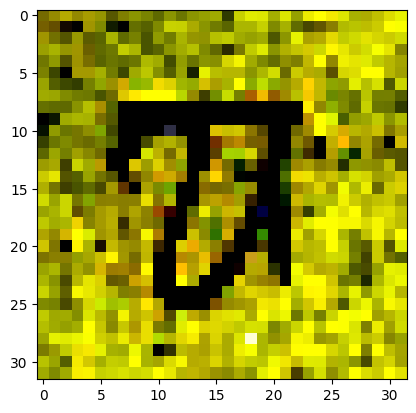

In [76]:
from tensorflow.keras.utils import load_img, img_to_array
def preprocess_image(image_path):
  image = load_img(image_path)
  image = tf.image.resize(image, (32,32))
  image = img_to_array(image)
  # image  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  # ret,image = cv2.threshold(image,160,240,cv2.THRESH_BINARY)
  # kernel = np.ones((1, 1), np.uint8)
  # image= cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=3)
  # image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  image = tf.reshape(image , ((1,)+image.shape))
  image = preprocess_train_image(image)
  # ret,image = cv2.threshold(image,160,240,cv2.THRESH_BINARY)
  return image
image_path = '/content/sample.jpg'
image = preprocess_image(image_path)




plt.imshow(image[0])

In [ ]:
import os

In [ ]:
path= os.walk('/content/train/Images/Images')

In [86]:
map = {
40:'४',
18:'ध',
41:'५',
8:'झ',
30:'ष',
22:'ब',
2:'ग',
10:'ट',
34:'त्र',
38:'२',
6:'छ',
25:'य',
29:'श',
42:'६',
45:'९',
27:'ल',
9:'न',
0:'क',
39:'३',
35:'ज्ञ',
15:'त',
3:'घ',
14:'ण',
37:'१',
11:'ठ',
44:'८',
24:'म',
12:'ड',
31:'स',
36:'०',
26:'र',
19:'न',
4:'ङ',
28:'व',
1:'ख',
43:'७',
32:'ह',
7:'ज',
21:'फ',
20:'प',
33:'क्ष',
23:'भ',
16:'थ',
5:'च',
13:'ढ',
17:'द',
}

In [87]:
def predict(image):
  pred = model.predict(image)
  pred = np.argmax(pred, axis = 1)
  pred = map[pred[0]]
  return pred

In [88]:
# a = list(val_ds)
# model.predict([tf.io.decode_image()])
predict(image)

1/1 [==============================] - 0s 21ms/step


'छ'

In [120]:
image_path = '/content/train/Images/Images/character_01_ka/10970.png'
image_path2 = '/content/sample.jpg'
image = val_ds.take(1)

def get_image(image_path):
  image = load_img(image_path)
  image = img_to_array(image)
  image = tf.image.resize(image,(32,32))
  image = tf.reshape(image , ((1,)+image.shape))
  image = preprocess_train_image(image)
  return image
# image = get_image(image_path)
image = image.get_single_element()[0]
# image = tf.reshape(image,(1, image[0],image[1],image[2]))
# image = preprocess_image(image_path)

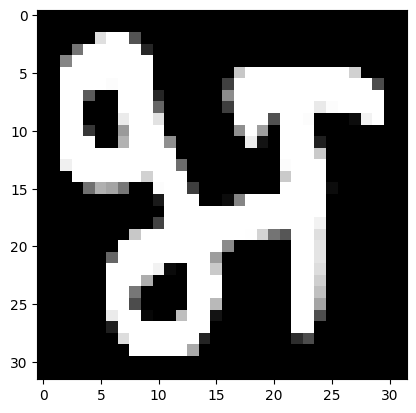

In [121]:
# plt.imshow(image[1])
plt.imshow(image[0])

In [122]:
predict(image)

1/1 [==============================] - 0s 24ms/step


'भ'